### CNN Convolution Task

In [1]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [2]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))
    x = Conv2D(filters=32 ,kernel_size=3, strides=1, padding='same', activation = 'relu')(input_tensor)
    x = Conv2D(filters=64, kernel_size=3, strides=1)(x)
    x = MaxPooling2D(2)(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model

In [3]:
from tensorflow.keras.datasets import mnist

(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [4]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model = create_model()
model.summary()
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy, metrics=['acc'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         692,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 720,714 (2.75 MB)

 Trainable params: 720,714 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - acc: 0.8871 - loss: 0.3738 - val_acc: 0.9799 - val_loss: 0.0679
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9847 - loss: 0.0513 - val_acc: 0.9796 - val_loss: 0.0617
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9894 - loss: 0.0343 - val_acc: 0.9829 - val_loss: 0.0567
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9916 - loss: 0.0260 - val_acc: 0.9874 - val_loss: 0.0416
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9936 - loss: 0.0191 - val_acc: 0.9893 - val_loss: 0.0426
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - acc: 0.9951 - loss: 0.0156 - val_acc: 0.9839 - val_loss: 0.0620
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9952 - loss: 0.0148 - val_acc: 0.9875 - val_loss: 0.0470
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9962 - loss: 0.0129 - val_acc: 0.9891 - val_loss: 0.0513
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13m

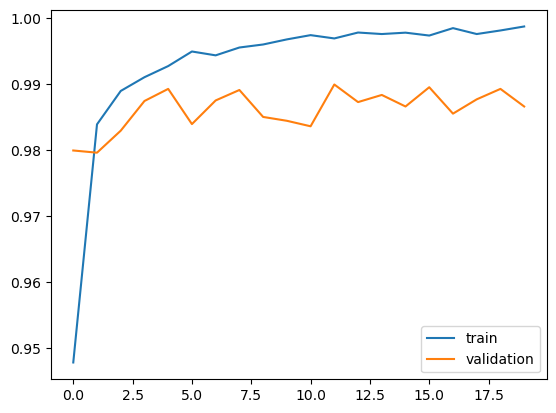

In [6]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

In [7]:
model.evaluate(test_images, test_oh_targets, batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9827 - loss: 0.1155


[0.09213431924581528, 0.9855999946594238]

In [8]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten, MaxPooling2D, Conv2D, Dropout
from tensorflow.keras.models import Model

INPUT_SIZE = 28

def create_dropout_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))
    x = Conv2D(filters=32 ,kernel_size=3, strides=1, padding='same', activation = 'relu')(input_tensor)
    x = Conv2D(filters=64, kernel_size=3, strides=1)(x)
    x = MaxPooling2D(2)(x)
    x = Flatten()(x)
    x = Dropout(rate = 0.5)(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model

In [9]:
from tensorflow.keras.datasets import mnist

(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model = create_dropout_model()
model.summary()
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy, metrics=['acc'])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         692,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 720,714 (2.75 MB)

 Trainable params: 720,714 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.8689 - loss: 0.4192 - val_acc: 0.9778 - val_loss: 0.0753
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9801 - loss: 0.0641 - val_acc: 0.9840 - val_loss: 0.0514
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.9860 - loss: 0.0429 - val_acc: 0.9868 - val_loss: 0.0465
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9880 - loss: 0.0359 - val_acc: 0.9837 - val_loss: 0.0541
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9904 - loss: 0.0281 - val_acc: 0.9881 - val_loss: 0.0416
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.9922 - loss: 0.0225 - val_acc: 0.9875 - val_loss: 0.0443
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9925 - loss: 0.0221 - val_acc: 0.9850 - val_loss: 0.0591
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9933 - loss: 0.0184 - val_acc: 0.9873 - val_loss: 0.0500
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12

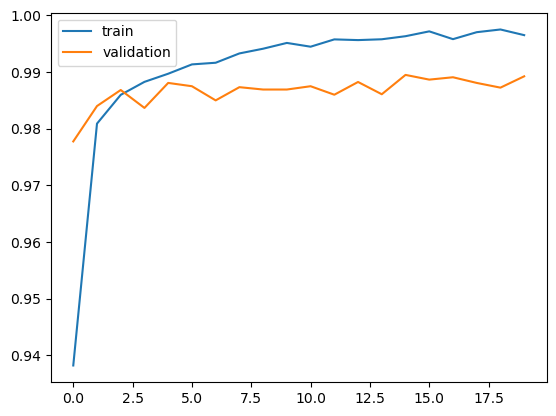

In [12]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

In [13]:
model.evaluate(test_images, test_oh_targets, batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9840 - loss: 0.0706


[0.050804346799850464, 0.9878000020980835]

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping


mcp_cb = ModelCheckpoint(
    filepath="./callback_files/practice/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    # 모든 epoch의 파일을 저장하지 않고 좋은 성능이라 판단될 경우만 저장할 때 True설정
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets), callbacks=[mcp_cb,rlr_cb, ely_cb])

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9968 - loss: 0.0102 - val_acc: 0.9887 - val_loss: 0.0559 - learning_rate: 0.0010
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9967 - loss: 0.0094 - val_acc: 0.9886 - val_loss: 0.0566 - learning_rate: 0.0010
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.9975 - loss: 0.0078 - val_acc: 0.9900 - val_loss: 0.0530 - learning_rate: 0.0010
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - acc: 0.9981 - loss: 0.0058 - val_acc: 0.9900 - val_loss: 0.0639 - learning_rate: 0.0010
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.9980 - loss: 0.0062 - val_acc: 0.9895 - val_loss: 0.0609 - learning_rate: 0.0010
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.9985 - loss: 0.0040 - val_acc: 0.9911 - val_loss: 0.0524 - learning_rate: 1.0000e-04
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9991 - loss: 0.0026 - val_acc: 0.9914 - val_loss: 0.0511 - learning_rate:

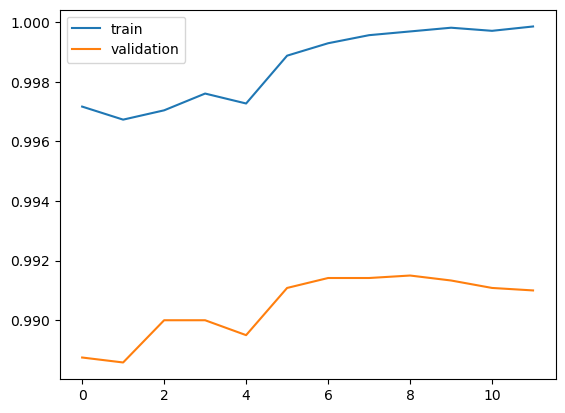

In [15]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

In [27]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten, MaxPooling2D, Conv2D, Dropout
from tensorflow.keras.models import Model

INPUT_SIZE = 28

def create_model2():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))
    x = Conv2D(filters=32 ,kernel_size=3, strides=1, padding='same', activation = 'relu')(input_tensor)
    x = Conv2D(filters=64, kernel_size=3, strides=1)(x)
    x = Conv2D(filters=128, kernel_size=3, strides=1)(x)
    x = MaxPooling2D(2)(x)
    x = Flatten()(x)
    x = Dropout(rate = 0.5)(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model = create_model2()
model.summary()
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy, metrics=['acc'])

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │       1,179,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,281,994 (4.89 MB)

 Trainable params: 1,281,994 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - acc: 0.8924 - loss: 0.3461 - val_acc: 0.9782 - val_loss: 0.0702
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - acc: 0.9799 - loss: 0.0659 - val_acc: 0.9820 - val_loss: 0.0584
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - acc: 0.9850 - loss: 0.0472 - val_acc: 0.9865 - val_loss: 0.0499
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - acc: 0.9877 - loss: 0.0377 - val_acc: 0.9866 - val_loss: 0.0471
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - acc: 0.9907 - loss: 0.0286 - val_acc: 0.9836 - val_loss: 0.0585
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - acc: 0.9922 - loss: 0.0252 - val_acc: 0.9880 - val_loss: 0.0411
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - acc: 0.9929 - loss: 0.0224 - val_acc: 0.9861 - val_loss: 0.0497
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - acc: 0.9943 - loss: 0.0180 - val_acc: 0.9869 - val_loss: 0.0551
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 

In [30]:
model.evaluate(test_images, test_oh_targets, batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - acc: 0.9829 - loss: 0.0785


[0.061571232974529266, 0.9872999787330627]